In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load dataset
df = pd.read_csv('/content/Titanic-Dataset.csv')

# Basic info
print(df.shape)
print(df.info())


(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [2]:
# Numeric summary
print(df.describe())

# Categorical summary
print(df.describe(include='object'))


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
                       Name   Sex  Ticket Cabin Embarked
count                   

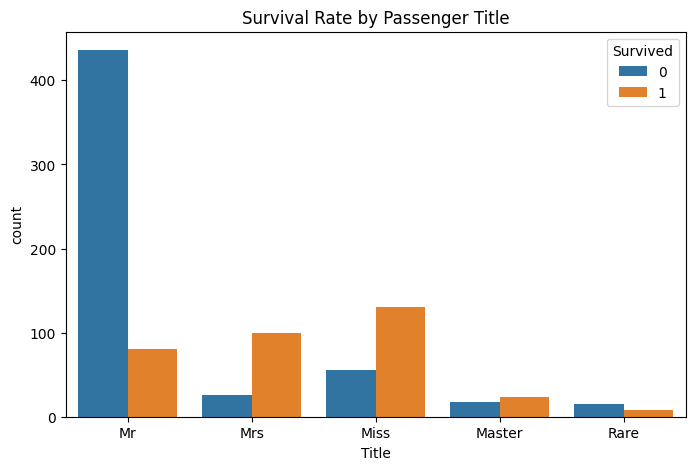

In [9]:
# Extract Title from Name
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Group rare titles
df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
df['Title'] = df['Title'].replace(
    ['Dr', 'Col', 'Major', 'Rev', 'Capt', 'Lady', 'Sir', 'Don', 'Jonkheer', 'Countess'],
    'Rare'
)

# Plot survival rate by Title
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Title', hue='Survived')
plt.title("Survival Rate by Passenger Title")
plt.show()


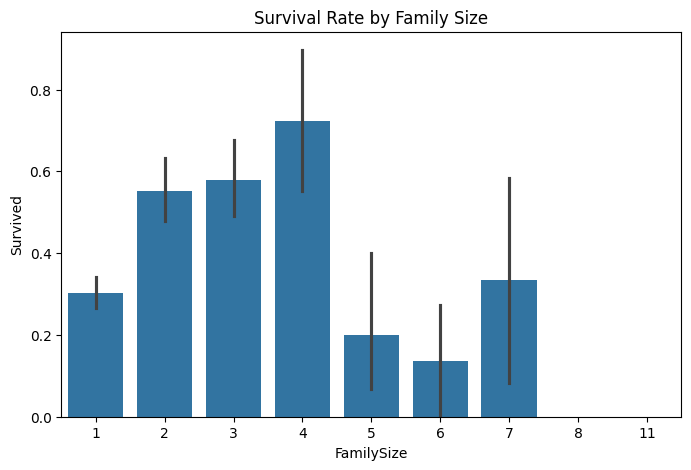

In [10]:
# Create Family Size feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Plot survival rate by family size
plt.figure(figsize=(8,5))
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title("Survival Rate by Family Size")
plt.show()


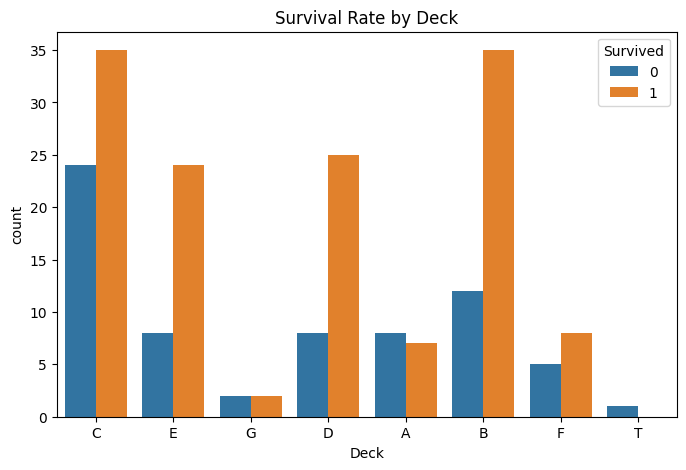

In [11]:
# Extract Deck information from Cabin
df['Deck'] = df['Cabin'].str[0]

# Plot survival rate by deck
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Deck', hue='Survived')
plt.title("Survival Rate by Deck")
plt.show()


In [12]:
df_deck = df.dropna(subset=['Deck'])


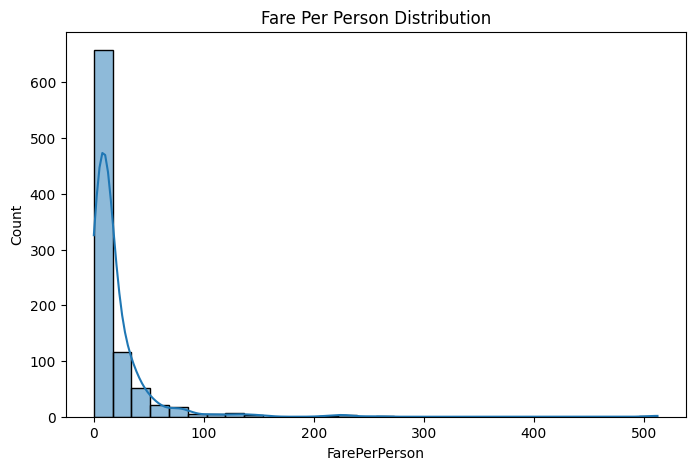

FarePerPersonBand
(-0.001, 7.25]       0.265487
(7.25, 8.3]          0.254545
(8.3, 23.667]        0.408072
(23.667, 512.329]    0.608108
Name: Survived, dtype: float64


/tmp/ipython-input-2793782149.py:12: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [13]:
# Calculate fare per person
df['FarePerPerson'] = df['Fare'] / df['FamilySize']

# Plot FarePerPerson distribution
plt.figure(figsize=(8,5))
sns.histplot(df['FarePerPerson'], kde=True, bins=30)
plt.title("Fare Per Person Distribution")
plt.show()

# Optional: Check survival by FarePerPerson quartiles
df['FarePerPersonBand'] = pd.qcut(df['FarePerPerson'], 4)
print(df.groupby('FarePerPersonBand')['Survived'].mean())


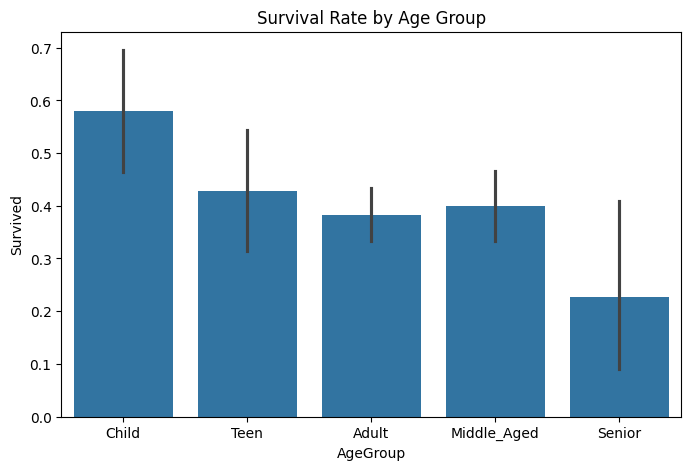

In [14]:
# Define age bins and labels
bins = [0, 12, 18, 35, 60, 80]
labels = ['Child', 'Teen', 'Adult', 'Middle_Aged', 'Senior']

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Plot survival rate by Age Group
plt.figure(figsize=(8,5))
sns.barplot(x='AgeGroup', y='Survived', data=df, order=labels)
plt.title("Survival Rate by Age Group")
plt.show()


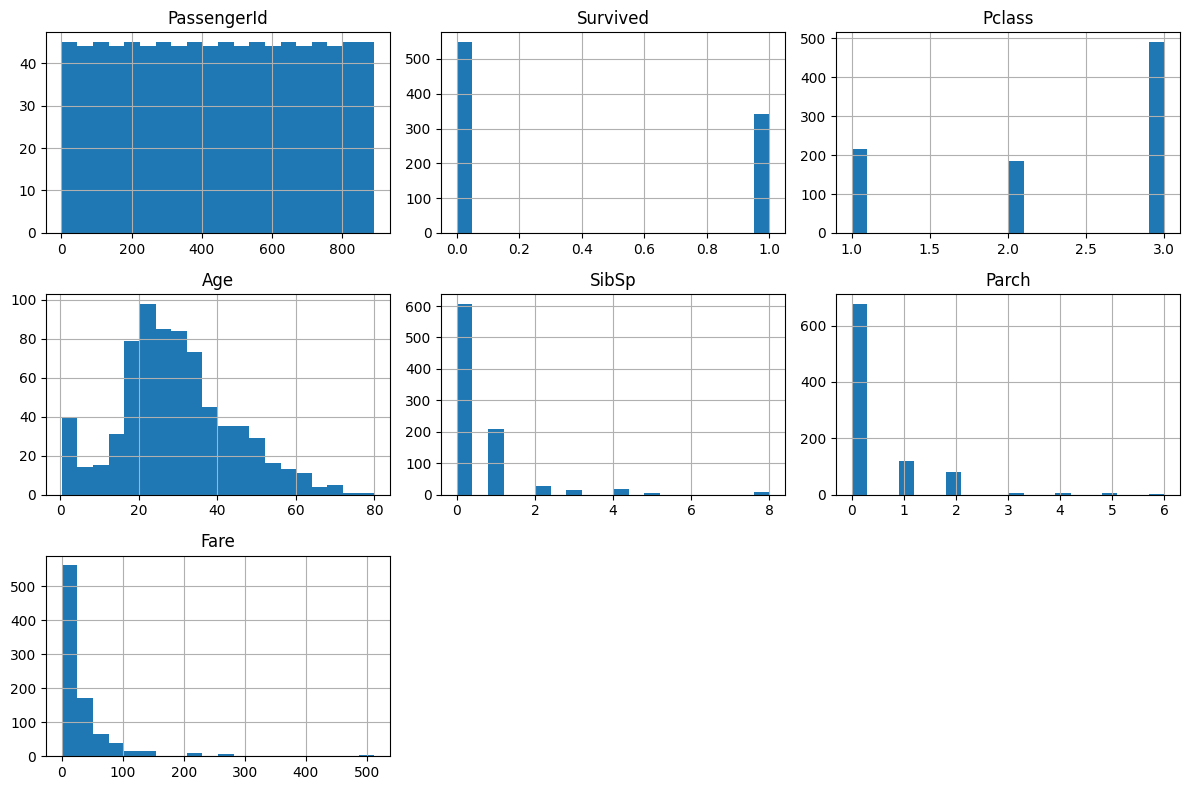

In [3]:
df.hist(figsize=(12,8), bins=20)
plt.tight_layout()
plt.show()


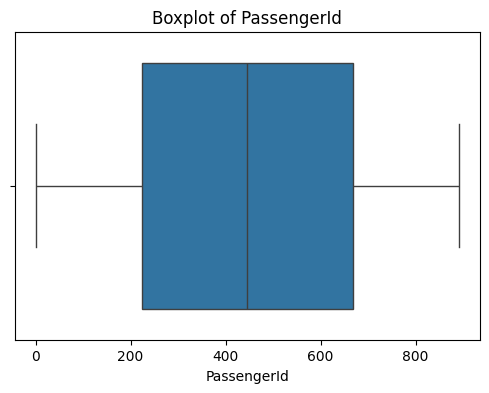

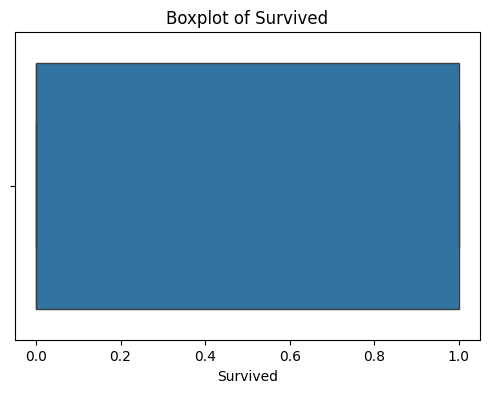

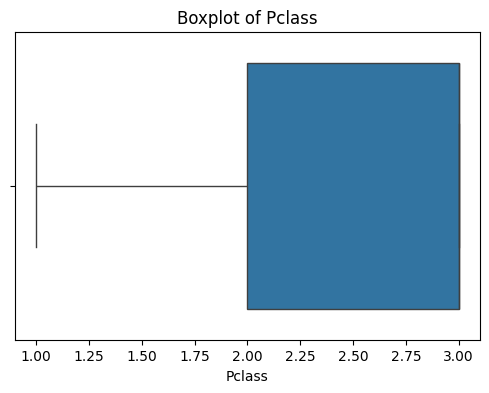

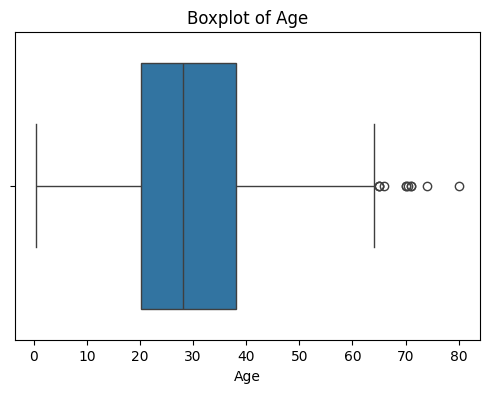

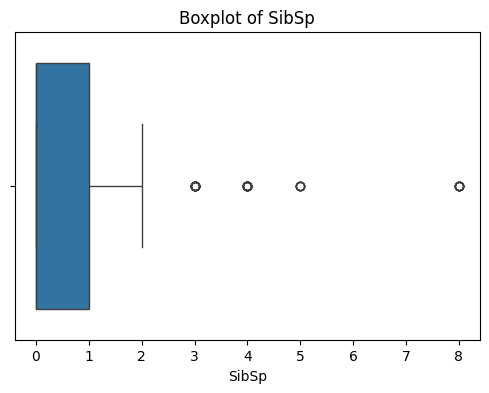

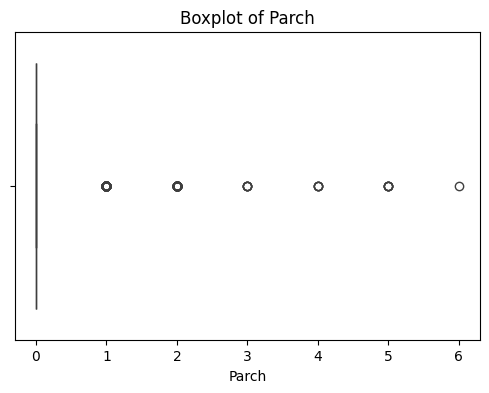

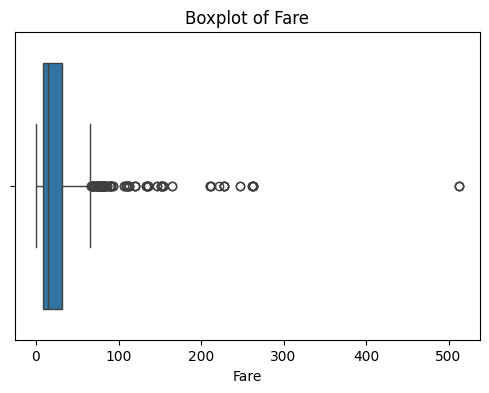

In [4]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


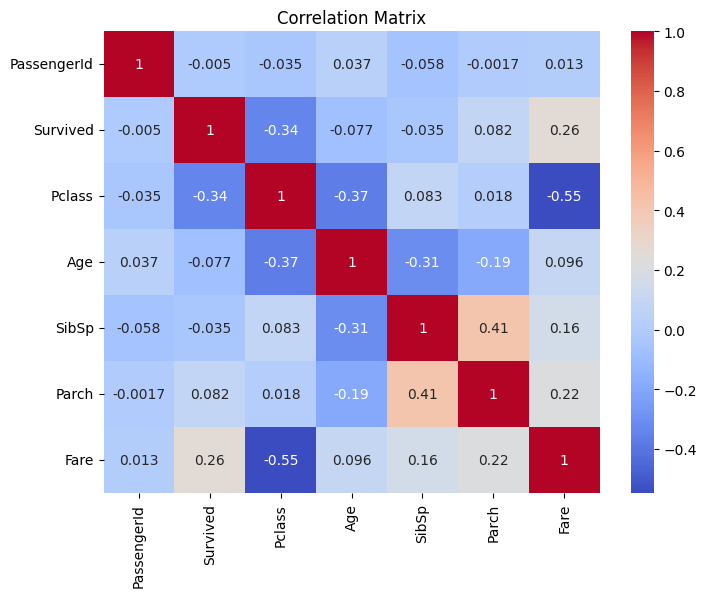

In [5]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


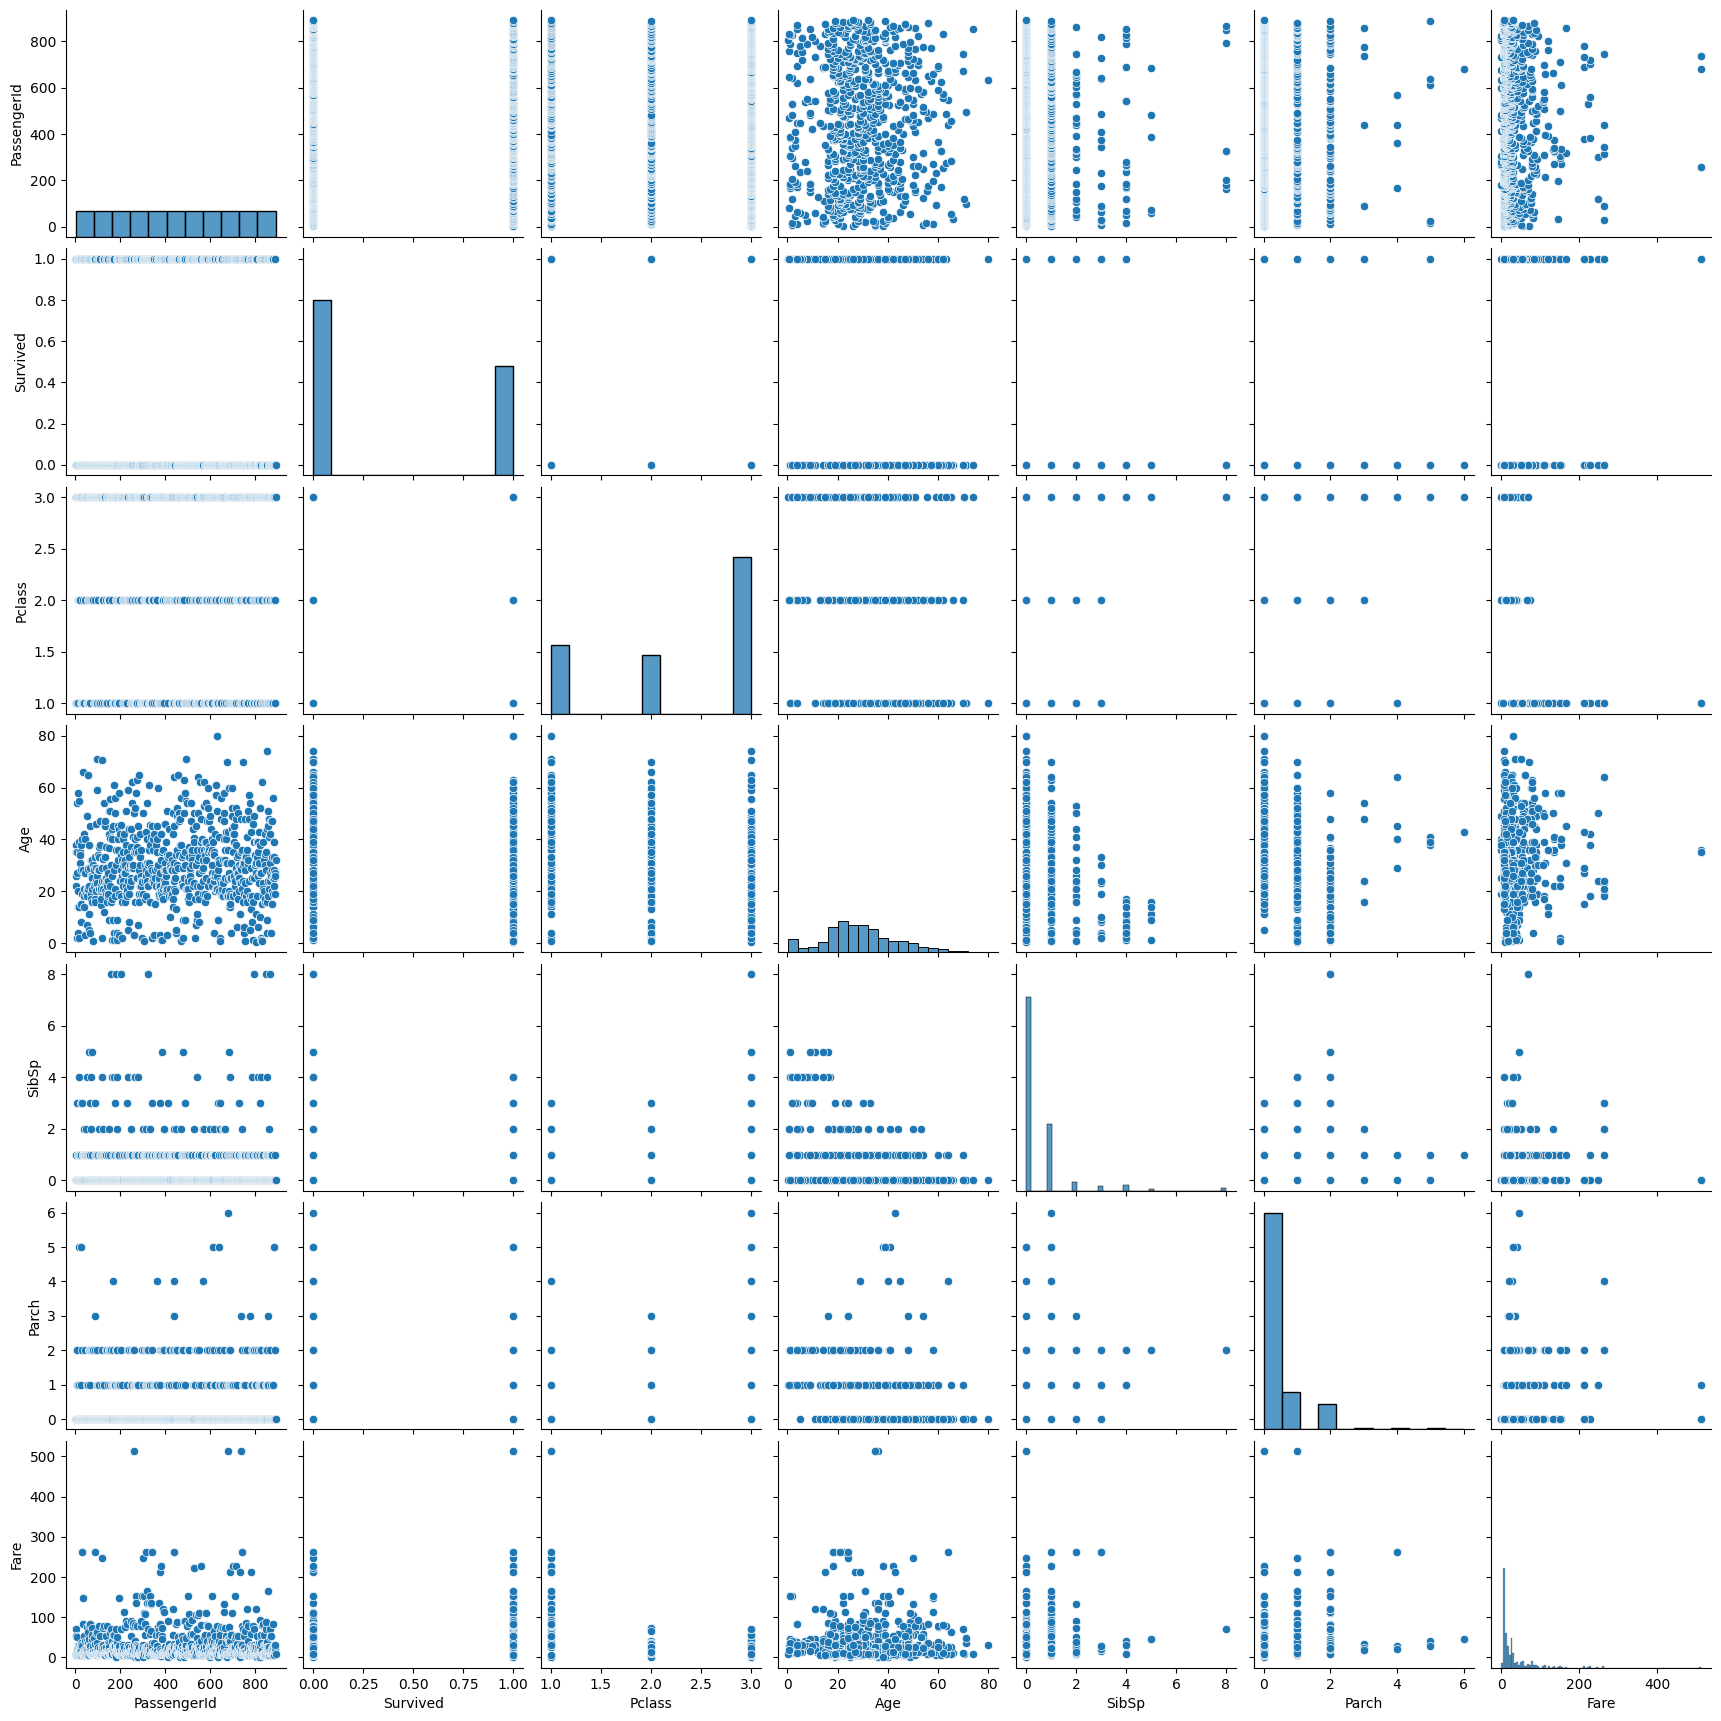

In [6]:
sns.pairplot(df.select_dtypes(include=['int64','float64']))
plt.show()


In [7]:
print(df.groupby('Pclass')['Survived'].mean())  # Survival rate by class


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [8]:
fig = px.scatter(df, x='Age', y='Fare', color='Survived', title='Age vs Fare by Survival')
fig.show()


In [15]:
import plotly.express as px

# Interactive scatter plot
fig = px.scatter(
    df,
    x='Age',
    y='Fare',
    color='Survived',
    size='FamilySize',
    hover_data=['Name', 'Pclass', 'Sex', 'Embarked', 'FarePerPerson'],
    title='Age vs Fare by Survival (Interactive)'
)

fig.show()
